# Visualisasi Sebaran Lokasi Gempabumi di Indonesia dengan Python

## Pendahuluan

Berikut ini langkah-langkah dalam membuat peta sebaran lokasi gempabumi yang terjadi di Indonesia dengan Python. *Package*  yang harus diinstal antara lain:
1. Pandas
2. Matplotlib
3. Basemap

jika belum tersedia bisa install melalui `pip install package` (harus online)
* instal Pandas     ===>  ` pip install pandas`
* instal matplotlib ===>  ` pip install matplotlib`
* install basemap   ===>  ` pip install basemap`



## Import `Package` 

Setelah berhasil diinstal, lakukan import untuk mengaktifkan modul package yang diperlukan. 
`import pandas as pd ` digunakan untuk mengimport modul untuk keperluan pembuatan tabel dataframe data katalog gempabumi. `import csv` digunakan untuk mengimport file format csv. `from mpl_toolkits.basemap import Basemap` untuk import Basemap dalam pembuatan Peta. `import matplotlib.pyplot as plt` digunakan untuk melakukan plot data.

In [1]:
import pandas as pd
import csv
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Import data dan pembuatan list kosong

Data gempa bumi diperoleh dari website U.S. Geological Survey (USGS) pada bagian Earthquake. Tautan untuk download data melalui link  <a href="https://earthquake.usgs.gov/earthquakes/search/" target="_blank">Earthquake Catalog</a>. Data yang digunakan dalam latihan ini `sample_katalog_gempa.csv` data cuplikan dari periode gempa tahun 2010 sejumlah 99 data.



Selanjutnya dibuat sebuah variabel list kosong yang berisi koordinat titik (longitude, latitude) dan besar gempa (magnitude). list kosong ini akan diisi dari tabel dataframe yang ditarik dari tabel katalog gempa.

In [2]:
# import data
data = 'sample_katalog_gempa.csv'

# List Kosong untuk diisi data cuplikan
lats, lons = [], []
magnitudes = []


## Read CSV data 

Katalog gempa ditampilkan dengan menggunakan pandas. katalog gempa terdiri dari beberapa kolom antara lain berisi waktu kejadian gempa bumi, koordinat (longitude, latitude), kedalaman gempa, magnitudo besar gempa bumi, satuan, dan keterangan lainnya. Kolom yang akan digunakan dalam latihan ini adalah kolom untuk koordinat dan besar magnitude.

In [3]:
df= pd.read_csv('sample_katalog_gempa.csv')
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2010-01-01T04:42:53.630Z,5.027,127.121,80.8,4.4,mb,33,117.7,NaN,0.72,...,2014-11-07T01:40:22.538Z,Philippine Islands region,earthquake,NaN,10.1,NaN,12.0,reviewed,us,us
1,2010-01-01T17:23:54.720Z,3.621,126.780,66.6,4.3,mb,38,130.7,NaN,0.95,...,2014-11-07T01:40:22.869Z,"Kepulauan Talaud, Indonesia",earthquake,NaN,12.5,NaN,15.0,reviewed,us,us
2,2010-01-01T18:14:32.220Z,-6.704,130.021,161.3,4.8,mb,57,54.8,NaN,1.05,...,2014-11-07T01:40:22.947Z,Banda Sea,earthquake,NaN,8.3,NaN,22.0,reviewed,us,us
3,2010-01-01T18:29:45.200Z,-1.900,101.136,27.4,4.3,mb,54,35.2,NaN,1.43,...,2014-11-07T01:40:22.969Z,"southern Sumatra, Indonesia",earthquake,NaN,28.8,NaN,12.0,reviewed,us,us
4,2010-01-02T07:27:04.230Z,-2.188,134.126,42.9,4.1,mb,20,105.7,NaN,1.07,...,2014-11-07T01:40:23.488Z,"near the north coast of Papua, Indonesia",earthquake,NaN,25.2,NaN,6.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2010-01-31T07:02:46.270Z,-2.878,100.906,50.7,5.0,mwc,110,28.9,NaN,1.07,...,2016-11-10T02:23:33.549Z,"Kepulauan Mentawai region, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,gcmt
95,2010-02-02T02:20:01.760Z,-6.363,129.753,35.0,4.6,mb,33,62.1,NaN,1.30,...,2014-11-07T01:40:38.394Z,Banda Sea,earthquake,NaN,NaN,NaN,12.0,reviewed,us,us
96,2010-02-02T14:41:32.950Z,-3.451,99.939,10.0,4.8,mb,46,124.4,NaN,0.80,...,2014-11-07T01:40:38.723Z,"southwest of Sumatra, Indonesia",earthquake,NaN,0.0,NaN,15.0,reviewed,us,us
97,2010-02-02T23:17:52.040Z,-0.721,135.872,39.8,4.7,mb,47,52.9,NaN,1.13,...,2014-11-07T01:40:38.929Z,"Biak region, Indonesia",earthquake,NaN,11.8,NaN,19.0,reviewed,us,us


Memilih Kolom yang akan digunakan. yaitu kolom Koordinat dan kolom magnitudo.

In [4]:
# mengambil data koordinat dan magnitudo dari raw data
df[['latitude', 'longitude', 'mag']]

,latitude,longitude,mag
0,5.027,127.121,4.4
1,3.621,126.780,4.3
2,-6.704,130.021,4.8
3,-1.900,101.136,4.3
4,-2.188,134.126,4.1
...,...,...,...
94,-2.878,100.906,5.0
95,-6.363,129.753,4.6
96,-3.451,99.939,4.8
97,-0.721,135.872,4.7


setelah dipilih. data dimasukkan dalam list kosong yang sudah dibuat di atas. berikut tampilan untuk contoh 5 buah data yang terbaca.

In [5]:
# membuat list data dari tabel dataframe 
# ke dalam list kosong yang sudah dibuat di atas

lats, lons = list(df['latitude']), list(df['longitude'])
magnitudes = list(df['mag'])

##mencoba untuk menampilkan data
print('lats', lats[0:5])
print('lons', lons[0:5])
print('magnitudes', magnitudes[0:5])

lats [5.027, 3.621, -6.704, -1.9, -2.188]
lons [127.121, 126.78, 130.021, 101.136, 134.126]
magnitudes [4.4, 4.3, 4.8, 4.3, 4.1]


## Pembuatan Peta

Pembuatan peta ini menggunakan modul `Basemap`. Referensi untuk pembuatan peta yang lebih lengkap bisa dilihat dalam tautan <a href="https://matplotlib.org/basemap/index.html" target="_blank">Matplotlib Basemap Toolkit documentation</a>.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


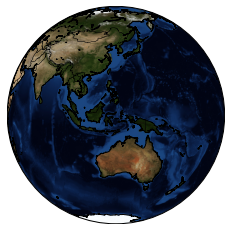

In [8]:
#membuat Peta 
peta = Basemap(projection='ortho', lat_0=0, lon_0=125,
           resolution='l', area_thresh=1000)

plt.figure()
peta.drawcoastlines()
#
# plt.show()
peta.drawcountries()  #menambah batas negara
# peta.fillcontinents(color='gray')  #menambah warna grey pada peta
# peta.fillcontinents(color='coral') #menambah warna coklat/coral pada peta
peta.bluemarble()  #menambah warna bluemarble
plt.show()

# Memperbesar (zoom) untuk wilayah Indonesia dan sekitarnya

Dari peta dunia yang sudah dibaut selanjutnya dilakukan zoom untuk wilayah Indonesia dan  sekitarnya disini mengambil untuk Koordinat  15 <sup>0</sup> LU- 15 <sup>0</sup> LS 90<sup>0</sup>-155 <sup>0</sup> BT. dan melakukan plot untuk satu titik data pada peta.

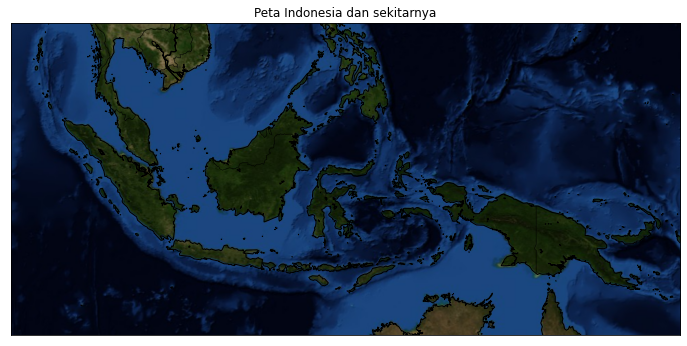

In [12]:
# Memperbesar (zoom) untuk wilayah Indonesia dan sekitarnya

peta = Basemap(projection='merc', lat_0=0, lon_0=125,
           resolution='l', area_thresh=0.1,
           llcrnrlon=90, llcrnrlat=-15,
           urcrnrlon=155, urcrnrlat=15)   #untuk resolusi area thresh diubar dari 1000 ke 0.1

#plt.figure()
plt.figure(figsize=(12 ,8)) #mengubah ukuran jendela
peta.drawcoastlines()
peta.drawcountries()
peta.bluemarble()
plt.title("Peta Indonesia dan sekitarnya")
plt.show()

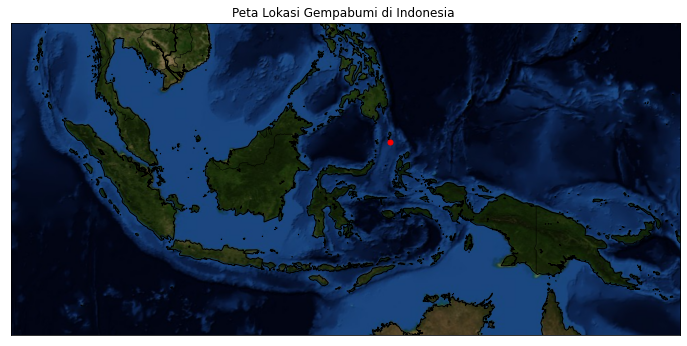

In [13]:
#plot titik lokasi Gempabumi dalam peta secara manual

peta = Basemap(projection='merc', lat_0=0, lon_0=125,
           resolution='l', area_thresh=0.1,
           llcrnrlon=90, llcrnrlat=-15,
           urcrnrlon=155, urcrnrlat=15)   #untuk resolusi area thresh diubar dari 1000 ke 0.1

#plt.figure()
plt.figure(figsize=(12 ,8)) #mengubah ukuran jendela
peta.drawcoastlines()
peta.drawcountries()
peta.bluemarble()
#data satu titik
lon = 126.78
lat = 3.621
x, y = peta(lon,lat)
peta.plot(x,y,'ro',markersize=5)
plt.title("Peta Lokasi Gempabumi di Indonesia ")
plt.show()

plot titik lokasi Gempabumi dalam peta dari data tabel dataframe pandas
`lats, lons = list(df['latitude']), list(df['longitude'])`
`magnitudes = list(df['mag'])`
plot titik diberi warna merah `peta.plot(x, y, 'ro', markersize=6)`.

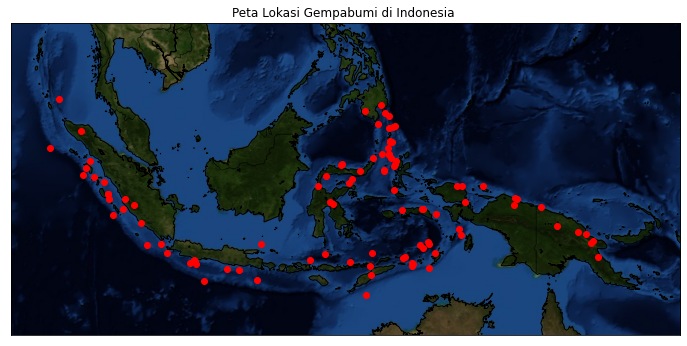

In [15]:
##plot titik lokasi Gempabumi dalam peta dari data tabel dataframe pandas
#lats, lons = list(df['latitude']), list(df['longitude'])
#magnitudes = list(df['mag'])

peta = Basemap(projection='merc', lat_0=0, lon_0=125,
           resolution='l', area_thresh=0.1,
           llcrnrlon=90, llcrnrlat=-15,
           urcrnrlon=155, urcrnrlat=15)   #untuk resolusi area thresh diubar dari 1000 ke 0.1

# plt.figure()
plt.figure(figsize=(12 ,8)) #mengubah ukuran jendela
peta.drawcoastlines()
peta.drawcountries()
peta.bluemarble()

x,y = peta(lons, lats)
peta.plot(x, y, 'ro', markersize=6)
plt.title("Peta Lokasi Gempabumi di Indonesia ")
plt.show()

Menambah variasi untuk ukuran titik lokasi gempabumi. Besar dan Kecil ukuran titik berdasarkan dari besarnya magnitudo gempa dikalikan dengan skala dasar `ukuran_titik = 2`. angka 2 dapat divariasi sesuai dengan kebutuhan tampilan. 

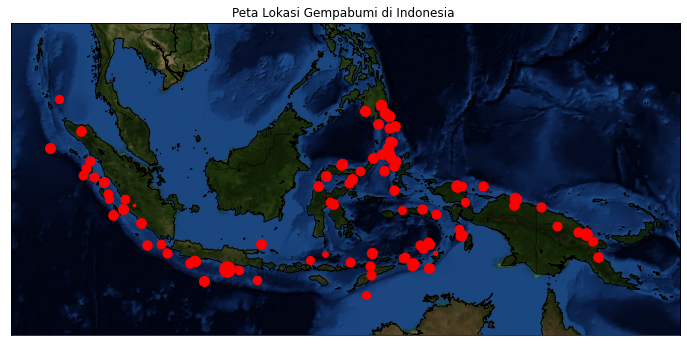

In [16]:
#menambah variasi untuk ukuran titik lokasi gempabumi
peta = Basemap(projection='merc', lat_0=0, lon_0=125,
           resolution='l', area_thresh=0.1,
           llcrnrlon=90, llcrnrlat=-15,
           urcrnrlon=155, urcrnrlat=15)   #untuk resolusi area thresh diubar dari 1000 ke 0.1

# plt.figure()
plt.figure(figsize=(12 ,8)) #mengubah ukuran jendela
peta.drawcoastlines()
peta.drawcountries()
peta.bluemarble()

#variasi ukuran titik lokasi gempa berdasar besar magnitudo
ukuran_titik = 2
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = peta(lon, lat)
    titik = mag * ukuran_titik
    peta.plot(x, y, 'ro', markersize=titik)
    plt.title("Peta Lokasi Gempabumi di Indonesia ")

plt.show()

Menambahkan variasi warna titik lokasi berdasarkan besar magnitudo. dengan algoritma jika magnitudo kurang dari mgnitudo 3 titik akan berwarna hijau, jika bernilai 3 -kurang dari 5 berwarna kuning. serta jika bernilai 5 diatasnya maka akan berwana merah. program ditambah baris `def warna(magnitudo):`. maka dalam peta terlihat ada beda warna.

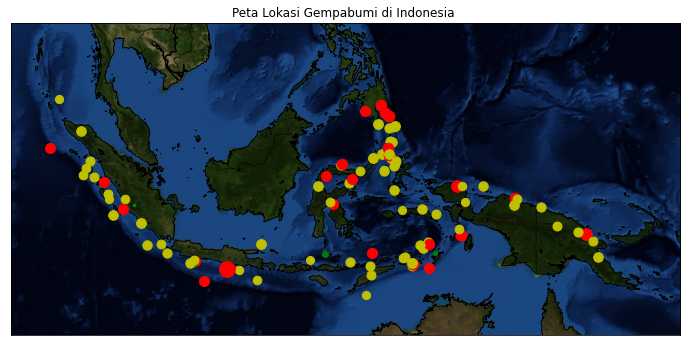

In [26]:
#variasi warna titik lokasi berdasarkan besar magnitudo
def warna(magnitudo):
    if magnitudo < 3.0:
        return ('go')   #lingkaran warna hijau
    elif magnitudo < 5.0:
        return ('yo')   #lingkaran warna kuning
    else:
        return ('ro')   #lingkaran warna merah


peta = Basemap(projection='merc', lat_0=0, lon_0=125,
           resolution='l', area_thresh=0.1,
           llcrnrlon=90, llcrnrlat=-15,
           urcrnrlon=155, urcrnrlat=15)   #untuk resolusi area thresh diubar dari 1000 ke 0.1

# plt.figure()
plt.figure(figsize=(12 ,8)) #mengubah ukuran jendela
peta.drawcoastlines()
peta.drawcountries()
peta.bluemarble()

ukuran_titik = 2
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = peta(lon, lat)
    titik = mag * ukuran_titik
    warna_titik = warna(mag)
    peta.plot(x, y, warna_titik, markersize=titik )
    plt.title("Peta Lokasi Gempabumi di Indonesia ")

plt.show()